In [1]:
ROLLINGAVGDAYS = 7

#COUNTRYLIST = ['Germany','Austria','Italy','Spain','Croatia','France','United Kingdom']
COUNTRYLIST = ['Germany','Switzerland']

valueType='Confirmed'
#valueType='Deaths'
print('you selected: ',valueType)

you selected:  Confirmed


In [2]:
import pandas as pd
import numpy as np
import requests
import io
import plotly.express as px
import plotly.graph_objects as go

#OLNY NECESSARY TO SHOW FIGURES IN GITHUB - CAN BE REMOVED OTHERWISE
import plotly.io as pio
pio.renderers.default = "svg"

urlConfimed       = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
urlDeaths         = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
urlRecovered      = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

filenameConfirmed = 'casesConfirmed.csv'
filenameDeaths    = 'casesDeaths.csv'
filenameRecovered = 'casesRecovered.csv'

dictData = {urlConfimed:filenameConfirmed, urlDeaths:filenameDeaths, urlRecovered:filenameRecovered}

def pullDataFromGit(dictData):
    for url in dictData.keys():
        filename = dictData[url]
        print('updated: ',filename)
        r = requests.get(url, allow_redirects=True)
        open(filename, 'wb').write(r.content)

pullDataFromGit(dictData)
    
dfConfirmed = pd.read_csv(filenameConfirmed)
dfDeaths    = pd.read_csv(filenameDeaths)
dfRecovered = pd.read_csv(filenameRecovered)

updated:  casesConfirmed.csv
updated:  casesDeaths.csv
updated:  casesRecovered.csv


In [3]:
if valueType=='Confirmed':
    df = dfConfirmed
elif valueType=='Deaths':
    df = dfDeaths
elif valueType=='Recovered':
    df = Recovered
else:
    df=None
    
df=df[df['Province/State']== 'Hong Kong'].transpose().iloc[4:]
df.rename(columns={df.columns[0]: "HK aggCount"},inplace = True)
df["HK dayCount"] = df['HK aggCount'].diff(1).rolling(ROLLINGAVGDAYS).mean()
df
fig1 = px.bar(df, x=df.index, y='HK dayCount',title="Hong Kong",labels={'x':'date'})

In [4]:
if valueType=='Confirmed':
    df = dfConfirmed
elif valueType=='Deaths':
    df = dfDeaths
elif valueType=='Recovered':
    df = Recovered
else:
    df=None
    
df = df[(df['Country/Region'].isin(COUNTRYLIST)) & (df['Province/State'].isnull())].drop(['Lat','Long','Province/State'], axis=1)
df.rename(columns={'Country/Region':'Date'}, inplace=True)
df=df.transpose()
df.columns = df.iloc[0]
df=df[1:]

for cty in COUNTRYLIST:
    df[cty+' dayCount'] = df[cty].diff(1).rolling(ROLLINGAVGDAYS).mean()

df
    
fig2= go.Figure()
for cty in COUNTRYLIST:
    fig2.add_trace(go.Bar(x=df.index, y=df[cty+' dayCount'],name=cty))

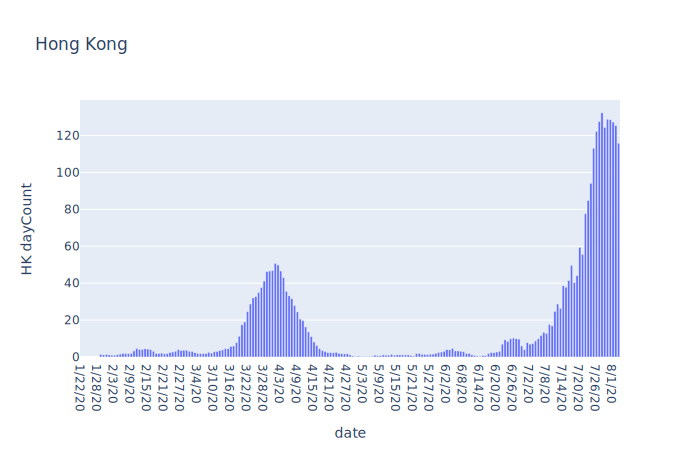

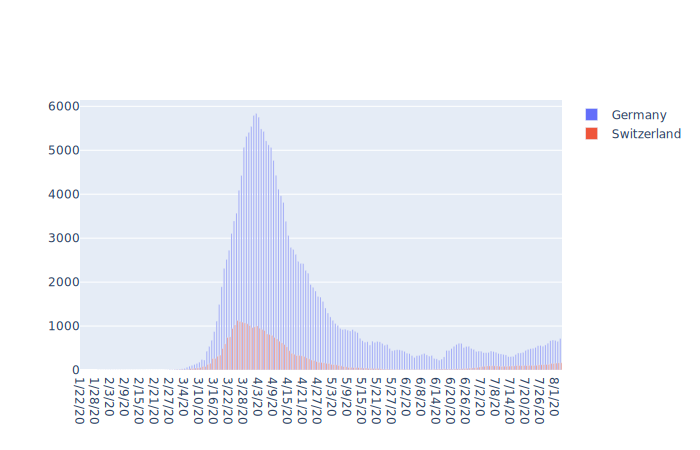

In [5]:
fig1.show()
fig2.show()